In [22]:
# Import libraries
import pandas_datareader as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

In [2]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2020,12,30)

crypto_currency = 'BTC'
against_currency = 'USD'

data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', start, end)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [4]:
data = data.reset_index()

In [5]:
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2293 non-null   datetime64[ns]
 1   High       2293 non-null   float64       
 2   Low        2293 non-null   float64       
 3   Open       2293 non-null   float64       
 4   Close      2293 non-null   float64       
 5   Volume     2293 non-null   float64       
 6   Adj Close  2293 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 125.5 KB


Text(0, 0.5, 'Closing Price(USD)')

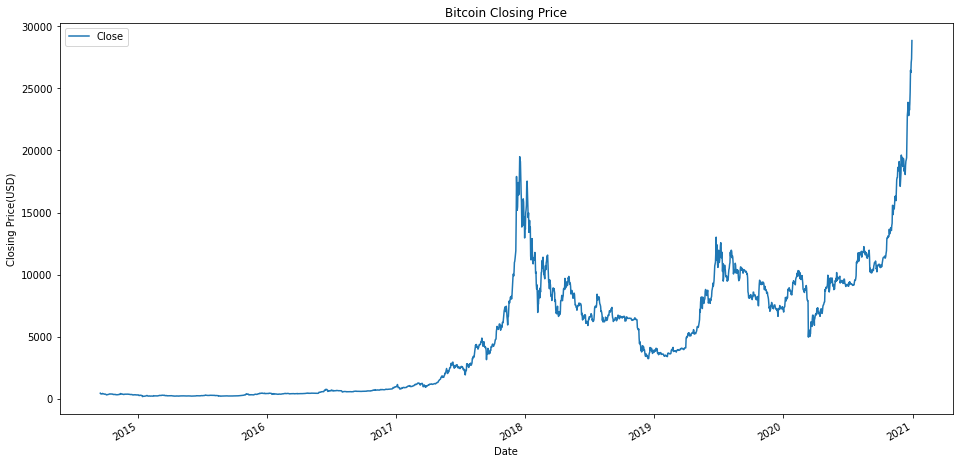

In [6]:
ax = data.plot(x='Date', y='Close', figsize=(16,8))
ax.set_title("Bitcoin Closing Price")
ax.set_xlabel("Date")
ax.set_ylabel("Closing Price(USD)")

In [7]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2293.000000,2293.000000,2293.000000,2293.000000,2.293000e+03,2293.000000
mean,5027.992189,4776.039363,4902.688298,4914.940651,9.052853e+09,4914.940651
std,4924.252885,4642.955547,4781.444462,4806.605529,1.276311e+10,4806.605529
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,450.377991,438.822998,444.726990,444.669006,6.205390e+07,444.669006
50%,3950.250000,3817.409424,3880.780029,3892.350098,3.159090e+09,3892.350098
75%,8602.401367,8183.350098,8370.049805,8374.686523,1.545352e+10,8374.686523
max,28937.740234,27360.089844,27360.089844,28840.953125,7.415677e+10,28840.953125


In [8]:
# calculating missing values in the dataset
missing_values = data.isnull().sum()
missing_per = (missing_values/data.shape[0])*100
missing_table = pd.concat([missing_values, missing_per], axis=1, ignore_index=True)
missing_table.rename(columns={0:'Total Missing Values', 1:'Missing %'}, inplace=True)

In [9]:
missing_table

,Total Missing Values,Missing %
Date,0,0.0
High,0,0.0
Low,0,0.0
Open,0,0.0
Close,0,0.0
Volume,0,0.0
Adj Close,0,0.0


In [12]:
print(data.head())
print("\n")
print(data.isnull().sum())

        Date        High         Low        Open       Close      Volume  \
0 2014-09-16  468.174011  452.421997  465.864014  457.334015  21056800.0   
1 2014-09-17  456.859985  413.104004  456.859985  424.440002  34483200.0   
2 2014-09-18  427.834991  384.532013  424.102997  394.795990  37919700.0   
3 2014-09-19  423.295990  389.882996  394.673004  408.903992  36863600.0   
4 2014-09-20  412.425995  393.181000  408.084991  398.821014  26580100.0   

    Adj Close  
0  457.334015  
1  424.440002  
2  394.795990  
3  408.903992  
4  398.821014  


Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


Data Visualisation

In [13]:
#create a copy
data_non_index = data.copy()
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

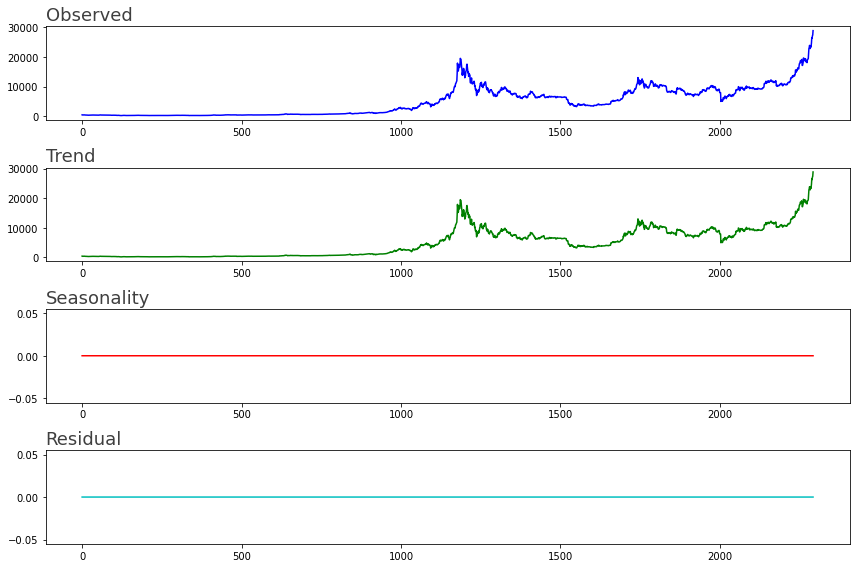

In [25]:
decomposition = sm.tsa.seasonal_decompose(data.Close,period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ax, fig = plt.subplots(figsize=(12,8), sharex=True)

plt.subplot(411)
plt.plot(data.Close,label='Original', color='b')
plt.title("Observed", loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(trend, label='Trend', color='g')
plt.title("Trend", loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='r')
plt.title("Seasonality", loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(residual, label='Residual', color='c')
plt.title("Residual", loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

Using such test is Dickey-Fuller Test. The DF tests a null hypothesis that a unit root is present in an autoregressive model. If value is less then < 0.05 then the data is stationary.

In [28]:
print("Dickey-Fuller stationary test: @=%f" % sm.tsa.adfuller(data["Close"])[1])

Dickey-Fuller stationary test: @=0.997377


In [31]:
df = data.copy()
lag_features = ["Open", "High", "Low", "Close", "Volume"]
window_1 = 3
window_2 = 7
window_3 = 30

df_rolled_3d = df[lag_features].rolling(window=window_1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window_2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window_3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1)
df_mean_7d = df_rolled_7d.mean().shift(1)
df_mean_30d = df_rolled_30d.mean().shift(1)

df_std_3d = df_rolled_3d.std().shift(1)
df_std_7d = df_rolled_7d.std().shift(1)
df_std_30d = df_rolled_30d.std().shift(1)

for feature in lag_features:
    df[f"{feature}_mean_lag{window_1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window_2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window_3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window_1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window_2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window_3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.head()

<ipython-input-31-e31fea4583f1>:28: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)


,Date,High,Low,Open,Close,Volume,Adj Close,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,4881.393424,4859.550417,4752.629557,...,4761.598832,126.535752,197.689861,423.666200,9.014135e+09,8.968829e+09,8.768604e+09,1.199004e+09,1.504035e+09,2.043763e+09
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,465.864014,465.864014,465.864014,...,457.334015,126.535752,197.689861,423.666200,2.105680e+07,2.105680e+07,2.105680e+07,1.199004e+09,1.504035e+09,2.043763e+09
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,461.362000,461.362000,461.362000,...,440.887009,23.259579,23.259579,23.259579,2.777000e+07,2.777000e+07,2.777000e+07,9.493898e+06,9.493898e+06,9.493898e+06
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,448.942332,448.942332,448.942332,...,425.523336,31.283084,31.283084,31.283084,3.115323e+07,3.115323e+07,3.115323e+07,8.910996e+06,8.910996e+06,8.910996e+06
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,425.211995,435.375000,435.375000,...,421.368500,14.827738,26.860222,26.860222,3.642217e+07,3.258082e+07,3.258082e+07,1.760264e+06,7.815965e+06,7.815965e+06


In [37]:
df_train = df[:int(len(df)*0.8)]
df_valid = df[int(len(df)*0.8):]

print('Train shape: ', df_train.shape)
print('Validation shape: ', df_valid.shape)

Train shape:  (1834, 37)
Validation shape:  (459, 37)


ARIMA MODEL

In [38]:
import pmdarima as pm

In [41]:
exogenous_features = ['Open_mean_lag3', 'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7', 'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
                      'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7','Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7', 
                      'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7', 'Close_std_lag30', 'Volume_mean_lag3', 'Volume_mean_lag7', 'Volume_mean_lag30', 'Volume_std_lag3', 'Volume_std_lag7', 'Volume_std_lag30']

In [42]:
model = pm.auto_arima(df_train.Close, exogenous=df_train[exogenous_features],trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close, exogenous=df_train[exogenous_features])
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=26224.862, Time=8.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26160.830, Time=6.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=26146.288, Time=6.54 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=26139.596, Time=7.55 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=38107.599, Time=5.76 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26139.788, Time=6.85 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=26136.423, Time=6.75 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=26134.886, Time=8.66 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=26118.117, Time=10.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=26115.591, Time=9.68 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=26121.018, Time=10.97 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=26120.653, Time=13.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=26114.032, Time=10.44 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=26134.765, Time=8.42 sec
 ARIMA(1,0,3)(0

<ipython-input-42-7d06d7e97a1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_ARIMAX"] = forecast


<AxesSubplot:>

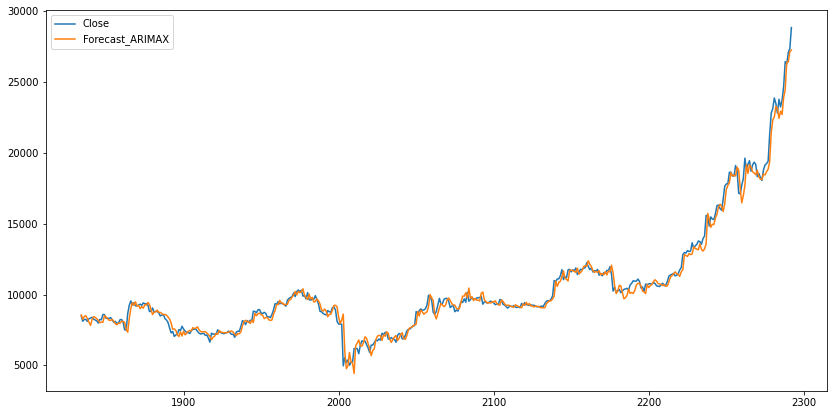

In [43]:
df_valid[["Close", "Forecast_ARIMAX"]].plot(figsize=(14,7))

In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX: ", np.sqrt(mean_squared_error(df_valid.Close, df_valid.Forecast_ARIMAX)))
print("MAE of Auto ARIMAX: ", mean_absolute_error(df_valid.Close, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX:  473.524662338943
MAE of Auto ARIMAX:  306.9154334417207


FB PROPHETS MODEL

In [45]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [48]:
# Renaming the column names according to Prophet's requirements
df_fb = df[['Date','Close']].rename({'Date':'ds', 'Close':'y'}, axis=1)
df_fb.head()

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014


In [50]:
print(df_fb.dtypes)

ds    datetime64[ns]
y            float64
dtype: object


In [56]:
train_fb = df_fb[:int(len(df_fb)*0.8)]
test_fb = df_fb[int(len(df_fb)*0.8):]

In [57]:
print("train data shape: ", train_fb.shape)
print("test data shape: ", test_fb.shape)

train data shape:  (1834, 2)
test data shape:  (459, 2)


In [58]:
model_fbp = Prophet()
for featrue in exogenous_features:
    model_fbp.add_regressor(featrue)

model_fbp.fit(df_train[["Date", "Close"] + exogenous_features].rename(columns={"Date": "ds", "Close": "y"}))

forecast = model_fbp.predict(df_valid[["Date", "Close"] + exogenous_features].rename(columns={"Date":"ds"}))
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_mean_lag3,Close_mean_lag3_lower,Close_mean_lag3_upper,Close_mean_lag30,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-24,3810.411904,8330.431228,9088.593773,3810.411904,3810.411904,12292.348031,12292.348031,12292.348031,-2748.588505,...,-14.693368,-14.693368,-14.693368,-22.796016,-22.796016,-22.796016,0.0,0.0,0.0,8716.946178
1,2019-09-25,3810.938490,7825.558766,8561.784452,3810.938490,3810.938490,11201.039500,11201.039500,11201.039500,-2722.736766,...,8.281712,8.281712,8.281712,-19.167825,-19.167825,-19.167825,0.0,0.0,0.0,8192.853200
2,2019-09-26,3811.465076,7956.142730,8666.335450,3811.465076,3811.465076,10091.151679,10091.151679,10091.151679,-2694.377767,...,8.911920,8.911920,8.911920,-15.267186,-15.267186,-15.267186,0.0,0.0,0.0,8318.344409
3,2019-09-27,3811.991662,8135.458413,8880.599549,3811.991662,3811.991662,9837.022465,9837.022465,9837.022465,-2673.757917,...,1.961482,1.961482,1.961482,-11.147733,-11.147733,-11.147733,0.0,0.0,0.0,8489.434884
4,2019-09-28,3812.518248,7935.211641,8678.797803,3812.518248,3812.518248,9670.866906,9670.866906,9670.866906,-2656.408146,...,2.060406,2.060406,2.060406,-6.864225,-6.864225,-6.864225,0.0,0.0,0.0,8309.706067


In [59]:
df_valid["Forecast_Prophet"] = forecast.yhat.values

<ipython-input-59-fe9be0424092>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid["Forecast_Prophet"] = forecast.yhat.values


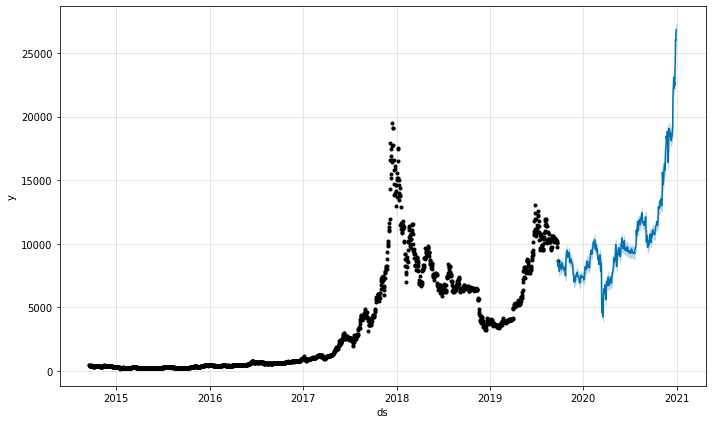

In [60]:
fig1 = model_fbp.plot(forecast)

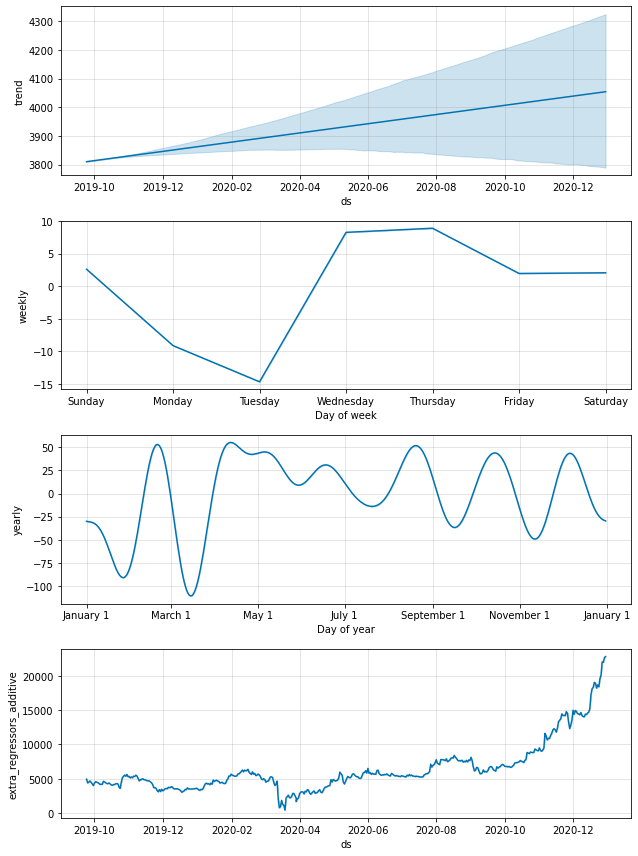

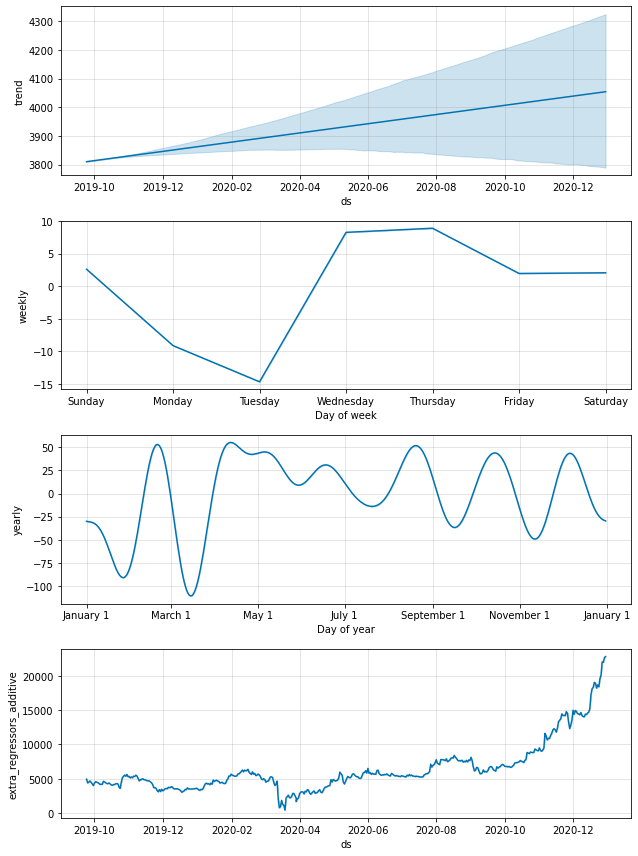

In [61]:
model_fbp.plot_components(forecast)

<AxesSubplot:>

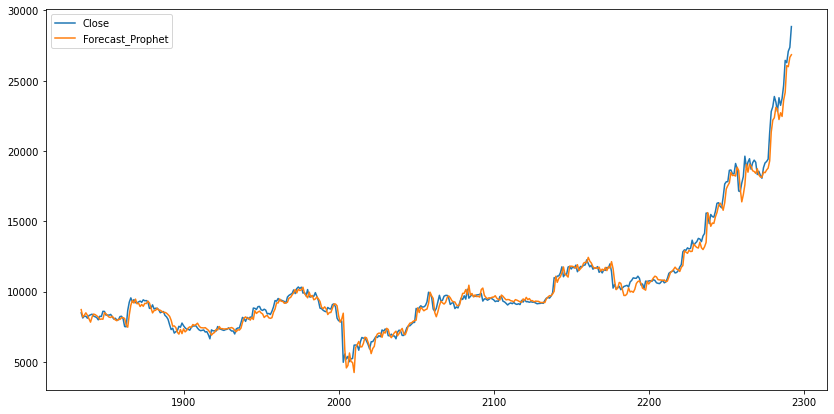

In [62]:
df_valid[["Close", "Forecast_Prophet"]].plot(figsize=(14,7))

In [64]:
test_mae = mean_absolute_error(df_valid["Close"], df_valid["Forecast_Prophet"])
test_rmse = np.sqrt(mean_squared_error(df_valid["Close"], df_valid["Forecast_Prophet"]))

print(f"Prophet's MAE: {test_mae}")
print(f"Prophet's RMSE: {test_rmse}")

Prophet's MAE: 328.4052251631872
Prophet's RMSE: 498.60339635932024


LSTM AND RNN

In [86]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Dense, LSTM, Activation
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import CuDNNLSTM

Normalization

In [70]:
scaler = MinMaxScaler()
close_price = data.Close.values.reshape(-1,1)
scaled_close = scaler.fit_transform(close_price)
scaled_close.shape, np.isnan(scaled_close).any()

((2293, 1), False)

In [71]:
scaled_close

array([[0.00974191],
       [0.0085943 ],
       [0.00756006],
       ...,
       [0.93873099],
       [0.94841701],
       [1.        ]])

In [72]:
train_data = scaled_close[:int(len(scaled_close)*0.8)]
test_data = scaled_close[int(len(scaled_close)*0.8):]

In [73]:
train_data.shape, test_data.shape

((1834, 1), (459, 1))

In [80]:
def windowed_dataset(series, time_step):
    dataX, dataY = [],[]
    for i in range(len(series) - time_step-1):
        a = series[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [82]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [83]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1733, 100), (1733,), (358, 100), (358,))

In [84]:
# reshape inputs
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape)
print(X_test.shape)

(1733, 100, 1)
(358, 100, 1)


In [89]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and Dropout
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.5))

# Adding the second LSTM layer and Dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))

# Adding the third LSTM layer and Dropout
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [90]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                

In [91]:
# Fitting the LSTM to the traing set
history = regressor.fit(X_train, y_train,validation_split=0.2, epochs=100, batch_size=32, verbose=1, shuffle=False)

Epoch 1/100
44/44 [==============================] - 7s 97ms/step - loss: 0.0030 - val_loss: 0.0102
Epoch 2/100
44/44 [==============================] - 3s 78ms/step - loss: 0.0113 - val_loss: 0.0056
Epoch 3/100
44/44 [==============================] - 3s 77ms/step - loss: 0.0131 - val_loss: 0.0084
Epoch 4/100
44/44 [==============================] - 3s 77ms/step - loss: 0.0132 - val_loss: 0.0071
Epoch 5/100
44/44 [==============================] - 3s 77ms/step - loss: 0.0094 - val_loss: 0.0054
Epoch 6/100
44/44 [==============================] - 3s 78ms/step - loss: 0.0035 - val_loss: 7.7844e-04
Epoch 7/100
44/44 [==============================] - 4s 91ms/step - loss: 0.0021 - val_loss: 7.4025e-04
Epoch 8/100
44/44 [==============================] - 4s 87ms/step - loss: 0.0022 - val_loss: 8.0138e-04
Epoch 9/100
44/44 [==============================] - 4s 88ms/step - loss: 0.0021 - val_loss: 9.3877e-04
Epoch 10/100
44/44 [==============================] - 4s 91ms/step - loss: 0.0021 - 

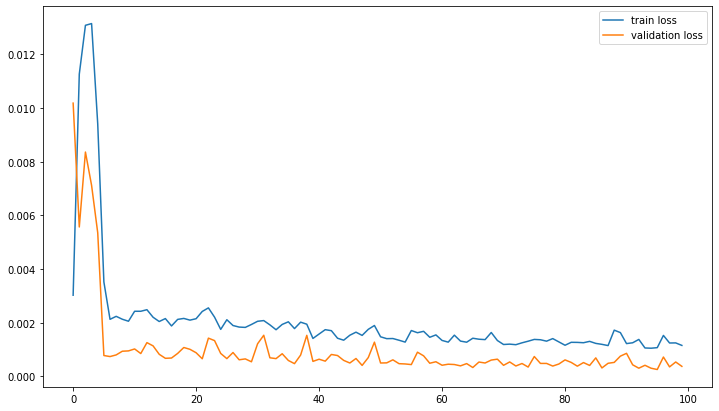

In [93]:
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()

In [94]:
# Prediction
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [95]:
# Transformation to original form
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
train_predict_inverse = scaler.inverse_transform(train_predict)
test_predict_inverse = scaler.inverse_transform(test_predict)

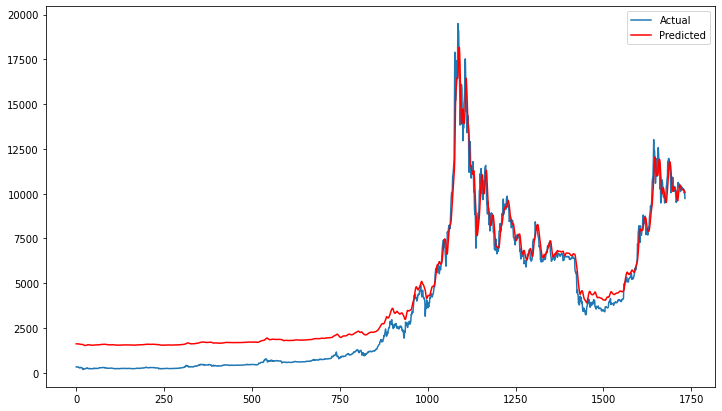

In [100]:
# Prediction on Training data
plt.figure(figsize=(12,7))
plt.plot(y_train_inverse.flatten(), label="Actual")
plt.plot(train_predict_inverse.flatten(),"r", label="Predicted")
plt.legend()

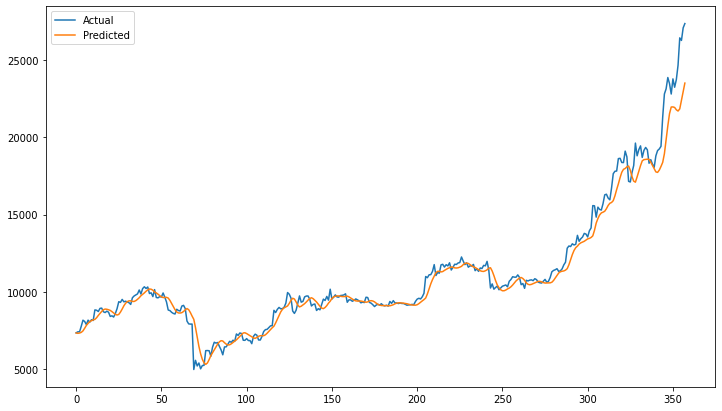

In [101]:
# Prediction on Test data
plt.figure(figsize=(12,7))
plt.plot(y_test_inverse.flatten(),label="Actual")
plt.plot(test_predict_inverse.flatten(),label="Predicted")
plt.legend()

In [106]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))

LSTM_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
LSTM_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))

In [107]:
print("Train RMSE: ", train_RMSE)
print("Train MAE: ", train_MAE)

print("Test RMSE: ", LSTM_RMSE)
print("Test MAE: ", LSTM_MAE)

Train RMSE:  0.0349968491625178
Train MAE:  0.17475384089893045
Test RMSE:  0.02912273275794989
Test MAE:  0.13162273652814546


Preprocessing

In [28]:
SEQ_LEN = 30
whole_data = np.empty([1,30,1])
whole_targets = np.empty([1,1])

def to_sequences(data, seq_len):
    d = []
    
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
    return np.array(d)

def preprocessing(data_raw, seq_len, train_split):
    
    global whole_data, whole_targets
    whole_data = to_sequences(data_raw, seq_len)
    whole_targets = whole_data[:,-1,:]
    print('whole_data: ', whole_data.shape)
    print('whole_targets: ', whole_targets.shape)
        
    num_train = int(train_split * data.shape[0])
    
    X_train = whole_data[:num_train, :, :]
    Y_train = whole_data[:num_train, -1, :]
    
    X_test = whole_data[num_train:, :, :]
    Y_test = whole_data[num_train:, -1, :]
    
    return X_train, Y_train, X_test, Y_test 
    
    

In [29]:
X_train, Y_train, X_test, Y_test = preprocessing(scaled_close, SEQ_LEN, train_split=0.7)
X_train.shape, X_test.shape

whole_data:  (2263, 30, 1)
whole_targets:  (2263, 1)


((1605, 30, 1), (658, 30, 1))

In [30]:
# Last 30 scaled values of the DataFrames
scaled_close[-30:], scaled_close.shape

(array([[0.64979215],
        [0.66368099],
        [0.67220445],
        [0.64619054],
        [0.66204608],
        [0.66870594],
        [0.66335092],
        [0.63298107],
        [0.64110209],
        [0.63102201],
        [0.62383194],
        [0.64981512],
        [0.66163273],
        [0.66527025],
        [0.67121633],
        [0.7372782 ],
        [0.78942112],
        [0.80103192],
        [0.82656571],
        [0.81287073],
        [0.78934854],
        [0.8235373 ],
        [0.80463885],
        [0.82189476],
        [0.85430053],
        [0.9161313 ],
        [0.91038371],
        [0.93873099],
        [0.94841701],
        [1.        ]]),
 (2293, 1))

Model

In [35]:
DROPOUT = 0.1
WINDOW_SIZE = SEQ_LEN

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
                        input_shape=(WINDOW_SIZE, X_train.shape[-1])))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))

model.add(Activation('linear'))

model.compile(
    loss='mean_squared_error', 
    optimizer='adam'
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 30, 60)            7680      
_________________________________________________________________
dropout (Dropout)            (None, 30, 60)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 30, 120)           58080     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 120)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60)                36240     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
_________________________________________________________________
activation (Activation)      (None, 1)                

In [37]:
BATCH_SIZE = 64
EPOCHS = 120

history = model.fit(
    X_train, 
    Y_train, 
    epochs=EPOCHS, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1
)

Epoch 1/120
23/23 [==============================] - 10s 121ms/step - loss: 0.0068 - val_loss: 0.0213
Epoch 2/120
23/23 [==============================] - 1s 50ms/step - loss: 0.0099 - val_loss: 0.0051
Epoch 3/120
23/23 [==============================] - 1s 50ms/step - loss: 0.0102 - val_loss: 0.0115
Epoch 4/120
23/23 [==============================] - 1s 47ms/step - loss: 0.0118 - val_loss: 0.0011
Epoch 5/120
23/23 [==============================] - 1s 51ms/step - loss: 0.0080 - val_loss: 3.4818e-04
Epoch 6/120
23/23 [==============================] - 1s 46ms/step - loss: 0.0066 - val_loss: 0.0049
Epoch 7/120
23/23 [==============================] - 1s 53ms/step - loss: 0.0080 - val_loss: 8.2821e-04
Epoch 8/120
23/23 [==============================] - 1s 46ms/step - loss: 0.0079 - val_loss: 6.9805e-04
Epoch 9/120
23/23 [==============================] - 1s 59ms/step - loss: 0.0015 - val_loss: 3.7605e-04
Epoch 10/120
23/23 [==============================] - 1s 55ms/step - loss: 0.0017 

In [38]:
model.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 11ms/step - loss: 0.0012


0.0012251570587977767

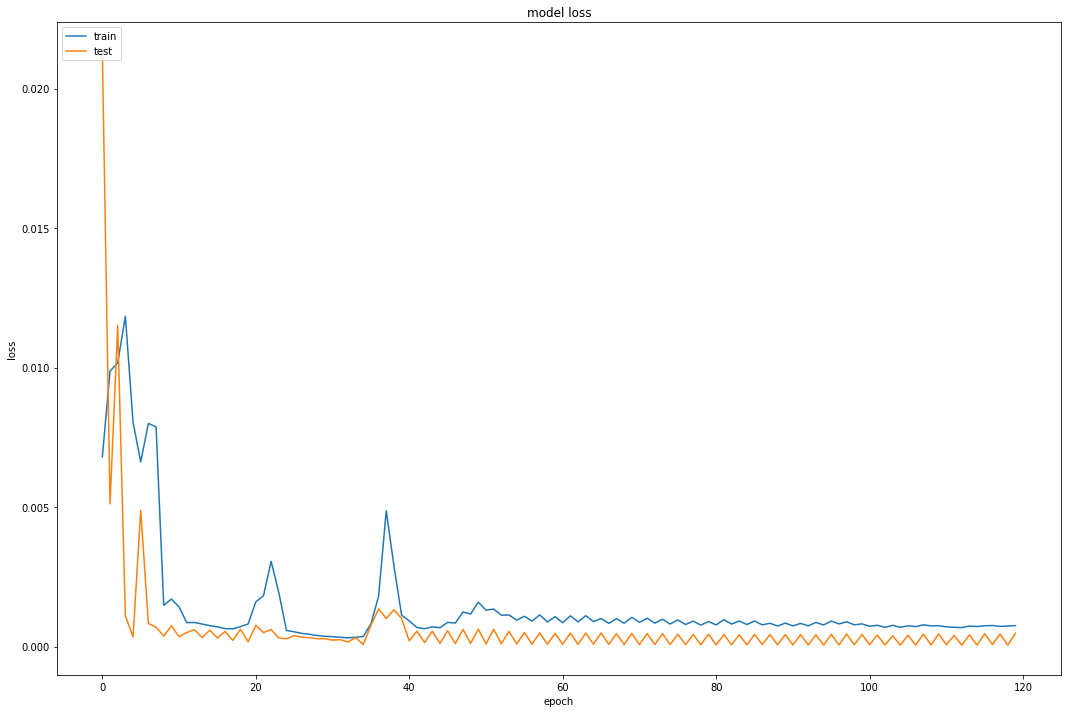

In [39]:
plt.figure(figsize = (18,12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

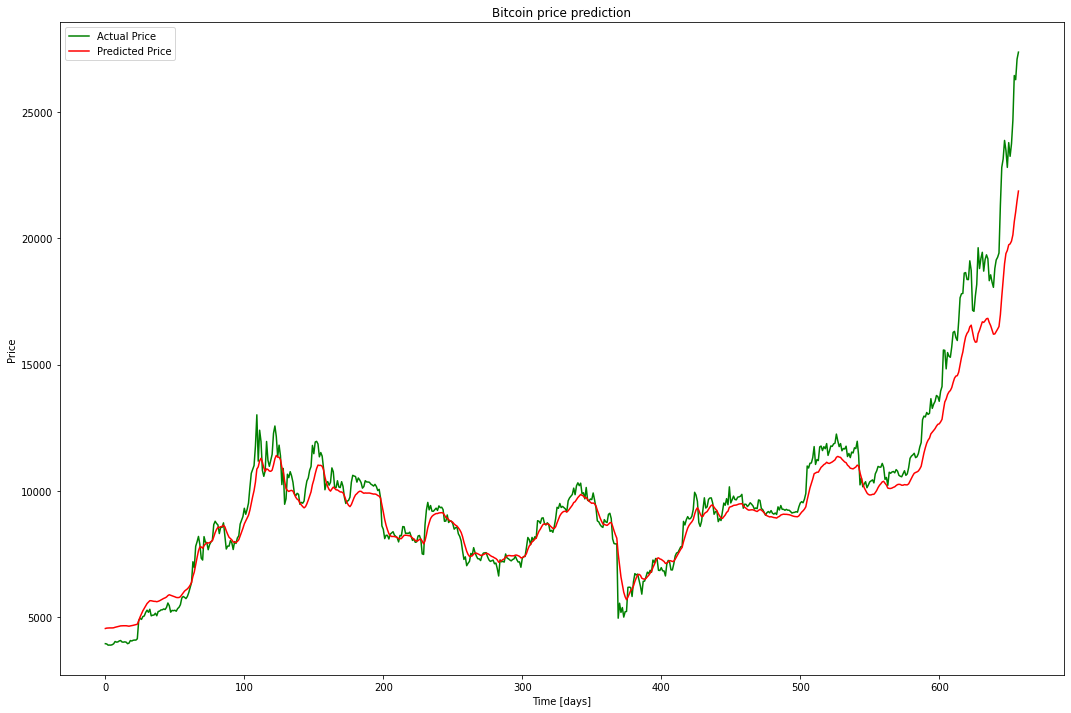

In [40]:
y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(Y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

plt.figure(figsize = (18,12))
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')

plt.show();

In [41]:
def get_prediction_array(X):
  """
  Inserts an other array to the end of the whole_data sequence in order to make
  array for predicting tomorrow's value

  returns: array of shape (None, 30, 1)
  """
  next = len(X)
  a = np.insert(X,[next],X[next-1], axis=0)
  for i_ in range(len(a[100]) - 1):
    if(i_ == 30):
      a[next][i_][0] == a[next][i_ - 1][0]
    else:
      a[next][i_][0] = a[next][i_ + 1][0]
  
  return a

In [42]:
pred_array = get_prediction_array(whole_data)
pred_array.shape

(2264, 30, 1)

In [43]:
pred_array[-2:], pred_array.shape


(array([[[0.67849962],
         [0.64979215],
         [0.66368099],
         [0.67220445],
         [0.64619054],
         [0.66204608],
         [0.66870594],
         [0.66335092],
         [0.63298107],
         [0.64110209],
         [0.63102201],
         [0.62383194],
         [0.64981512],
         [0.66163273],
         [0.66527025],
         [0.67121633],
         [0.7372782 ],
         [0.78942112],
         [0.80103192],
         [0.82656571],
         [0.81287073],
         [0.78934854],
         [0.8235373 ],
         [0.80463885],
         [0.82189476],
         [0.85430053],
         [0.9161313 ],
         [0.91038371],
         [0.93873099],
         [0.94841701]],
 
        [[0.64979215],
         [0.66368099],
         [0.67220445],
         [0.64619054],
         [0.66204608],
         [0.66870594],
         [0.66335092],
         [0.63298107],
         [0.64110209],
         [0.63102201],
         [0.62383194],
         [0.64981512],
         [0.66163273],
        

In [44]:
targ_array = get_prediction_array(whole_targets)
targ_array.shape

(2264, 1)

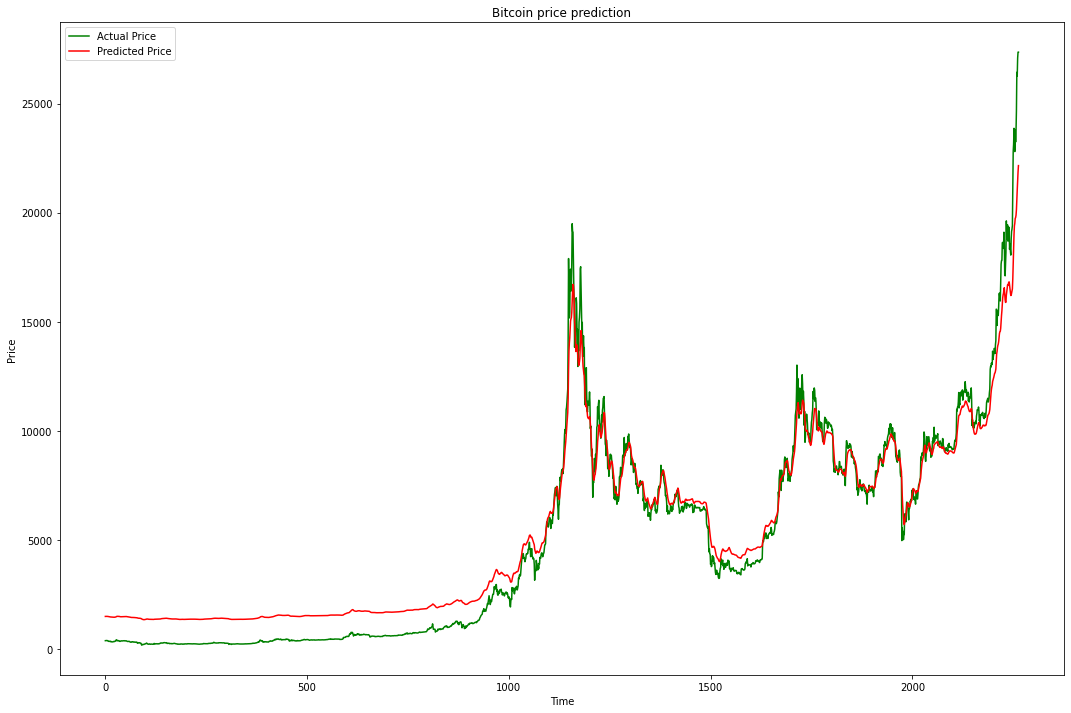

In [46]:
y_hat = model.predict(pred_array)

y_true_inverse = scaler.inverse_transform(targ_array)
y_hat_inverse = scaler.inverse_transform(y_hat)

plt.figure(figsize = (18,12))
plt.plot(y_true_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Bitcoin price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();

In [47]:
print('Predicted Bitcoin price for the next day: {} and predicted Bitcoin price for the next day: {}'.format(y_hat_inverse[-1], y_true_inverse[-1]))

Predicted Bitcoin price for the next day: [22160.566] and predicted Bitcoin price for the next day: [27362.4375]


In [108]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [116]:
trace1 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Close'],
    mode = 'lines',
    name = 'Close'
)

trace2 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Forecast_ARIMAX'],
    mode = 'lines',
    name = 'ARIMA Forecast'
)
trace3 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Forecast_Prophet'],
    mode = 'lines',
    name = 'Prophet Forecast'
)

trace4 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Close'],
    mode = 'lines',
    name = 'Forecast_LSTM'
)


layout = dict(
    title='Model Comparison ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2,trace3,trace4]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")